In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import preprocessing as pre
import pickle

In [2]:
X,y = pre.load_data('data/fashion_train.npy')
X_standardized_rows = pre.standardize(X,axis=1) # standardize the data by row (per-image standardization)

### Principal Component Analysis

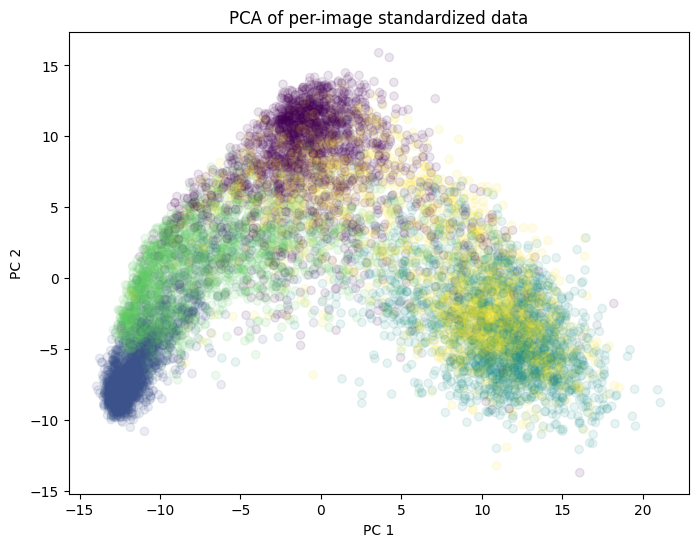

In [50]:
# Perform PCA right after per-image standardization, while also centering the data to avoid bias during PCA
pca = PCA(n_components=2)
X_standardized_rows_centered = X_standardized_rows - np.mean(X_standardized_rows, axis=0)
pca.fit(X_standardized_rows_centered)
score=pca.transform(X_standardized_rows_centered)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 0], score[:, 1], c=y, cmap='viridis', alpha=0.1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of per-image standardized data')
plt.show()

### Parallel Analysis

In [125]:
def parallel_analysis(data,n):
    # center data
    normalized_shapeMatrix=data - data.mean(axis=0,keepdims=True)
    # fit pca onto data to obtain explained variances
    pca = PCA()
    pca.fit(normalized_shapeMatrix)
    # init zero array for the mean random explained variances
    random_explained_variances = np.zeros(normalized_shapeMatrix.shape[1])
    for i in range(n):
        print("|"*int(100*(i/n)),end="")
        print(" "*(99-int(100*(i/n))),end="")
        print("|",end="\r")
        # create random data
        random_shapeMatrix = pd.DataFrame(np.random.normal(0, 1, [normalized_shapeMatrix.shape[0], normalized_shapeMatrix.shape[1]]))
        # fit random data to a new pca
        pca_random = PCA()
        pca_random.fit(random_shapeMatrix)
        # store the sum of all random explained variances to get the mean at the end
        random_explained_variances = random_explained_variances+pca_random.explained_variance_ratio_
    # get the mean of random expalined variances
    random_explained_variances = random_explained_variances / n
    # return explained variances for our data and for random data
    return pca.explained_variance_ratio_,random_explained_variances

In [ ]:
# run parallel analysis
expalined_variance_real, explained_variance_random = parallel_analysis(X_standardized_rows,1000)

In [ ]:
# Determine the optimal amount of components by getting the point where the explained variance of the data equals (or is less than) for random data
filtered = (pca.explained_variance_ratio_ <= explained_variance_random)
component_count = 0
for i in range(len(filtered)):
    if filtered[i]==True:
        component_count=i+1
        break
component_count

In [ ]:
# Save the PCA object after fitting it to the per-image standardized, and centered data
pca = PCA(n_components=component_count)
X_standardized_rows_centered = X_standardized_rows - np.mean(X_standardized_rows, axis=0)
pca.fit(X_standardized_rows_centered)
with open('models/pca_65.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [ ]:
# scree plot for visualization
plt.plot(expalined_variance_real[:100], label='original data')
plt.plot(explained_variance_random[:100], label='random data')
plt.scatter(component_count-1,explained_variance_random[component_count-1],c="green",label="intersection")
plt.ylim([0,0.05])
plt.xlabel("Component number")
plt.ylabel("Explained variance ratio")
plt.legend()
plt.title('Scree Plot')
plt.show()